<a href="https://colab.research.google.com/github/iam-fern/Generate_groupwise_1X/blob/main/GQtest_cluster_groupwise_(y_hat)_0_5_n250_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import os
import statistics as stats
import scipy.stats as ss
import scipy.stats as st
from scipy.stats import f_oneway
from scipy import stats
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import drive
from statsmodels.formula.api import ols
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_groupwise_1X/groupwise_0.5_type_I _error'

In [4]:
os.listdir(base_path)

['data_groupwise_0.5_n250.csv',
 'data_groupwise_0.5_n120.csv',
 'data_groupwise_0.5_n60.csv',
 'data_groupwise_0.5_n30.csv',
 'data_groupwise_0.5_n20.csv']

In [5]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_groupwise_0.5_n250.csv')

In [6]:
df = pd.read_csv(file_path)
df

,rep,index,x1,e,Y,y_hat,e_hat
0,0.0,0.0,78.089696,0.189160,88.278856,88.098523,0.180334
1,0.0,1.0,92.140765,0.705827,102.846591,102.126159,0.720432
2,0.0,2.0,31.034409,-0.160290,40.874119,41.121707,-0.247587
3,0.0,3.0,89.069616,0.080336,99.149952,99.060132,0.089820
4,0.0,4.0,92.560094,0.555530,103.115625,102.544790,0.570835
...,...,...,...,...,...,...,...
249995,999.0,245.0,79.644636,1.280399,90.925036,89.619384,1.305651
249996,999.0,246.0,34.871978,0.195598,45.067577,44.949453,0.118124
249997,999.0,247.0,22.228822,0.019957,32.248780,32.335306,-0.086526
249998,999.0,248.0,50.803757,0.371473,61.175230,60.844678,0.330553


In [7]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         e           Y       y_hat     e_hat
rep   index                                                       
0.0   0.0    78.089696  0.189160   88.278856   88.098523  0.180334
      1.0    92.140765  0.705827  102.846591  102.126159  0.720432
      2.0    31.034409 -0.160290   40.874119   41.121707 -0.247587
      3.0    89.069616  0.080336   99.149952   99.060132  0.089820
      4.0    92.560094  0.555530  103.115625  102.544790  0.570835
...                ...       ...         ...         ...       ...
999.0 245.0  79.644636  1.280399   90.925036   89.619384  1.305651
      246.0  34.871978  0.195598   45.067577   44.949453  0.118124
      247.0  22.228822  0.019957   32.248780   32.335306 -0.086526
      248.0  50.803757  0.371473   61.175230   60.844678  0.330553
      249.0  93.652799  0.403011  104.055809  103.595406  0.460403

[250000 rows x 5 columns]

In [8]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         e           Y       y_hat     e_hat
rep   index                                                       
0.0   0.0    78.089696  0.189160   88.278856   88.098523  0.180334
      1.0    92.140765  0.705827  102.846591  102.126159  0.720432
      2.0    31.034409 -0.160290   40.874119   41.121707 -0.247587
      3.0    89.069616  0.080336   99.149952   99.060132  0.089820
      4.0    92.560094  0.555530  103.115625  102.544790  0.570835
...                ...       ...         ...         ...       ...
999.0 245.0  79.644636  1.280399   90.925036   89.619384  1.305651
      246.0  34.871978  0.195598   45.067577   44.949453  0.118124
      247.0  22.228822  0.019957   32.248780   32.335306 -0.086526
      248.0  50.803757  0.371473   61.175230   60.844678  0.330553
      249.0  93.652799  0.403011  104.055809  103.595406  0.460403

[250000 rows x 5 columns]

In [9]:
table.reset_index(inplace=True)
table

,rep,index,x1,e,Y,y_hat,e_hat
0,0.0,0.0,78.089696,0.189160,88.278856,88.098523,0.180334
1,0.0,1.0,92.140765,0.705827,102.846591,102.126159,0.720432
2,0.0,2.0,31.034409,-0.160290,40.874119,41.121707,-0.247587
3,0.0,3.0,89.069616,0.080336,99.149952,99.060132,0.089820
4,0.0,4.0,92.560094,0.555530,103.115625,102.544790,0.570835
...,...,...,...,...,...,...,...
249995,999.0,245.0,79.644636,1.280399,90.925036,89.619384,1.305651
249996,999.0,246.0,34.871978,0.195598,45.067577,44.949453,0.118124
249997,999.0,247.0,22.228822,0.019957,32.248780,32.335306,-0.086526
249998,999.0,248.0,50.803757,0.371473,61.175230,60.844678,0.330553


In [10]:
table.set_index(['rep', 'index'], inplace=True)

In [11]:
table

x1         e           Y       y_hat     e_hat
rep   index                                                       
0.0   0.0    78.089696  0.189160   88.278856   88.098523  0.180334
      1.0    92.140765  0.705827  102.846591  102.126159  0.720432
      2.0    31.034409 -0.160290   40.874119   41.121707 -0.247587
      3.0    89.069616  0.080336   99.149952   99.060132  0.089820
      4.0    92.560094  0.555530  103.115625  102.544790  0.570835
...                ...       ...         ...         ...       ...
999.0 245.0  79.644636  1.280399   90.925036   89.619384  1.305651
      246.0  34.871978  0.195598   45.067577   44.949453  0.118124
      247.0  22.228822  0.019957   32.248780   32.335306 -0.086526
      248.0  50.803757  0.371473   61.175230   60.844678  0.330553
      249.0  93.652799  0.403011  104.055809  103.595406  0.460403

[250000 rows x 5 columns]

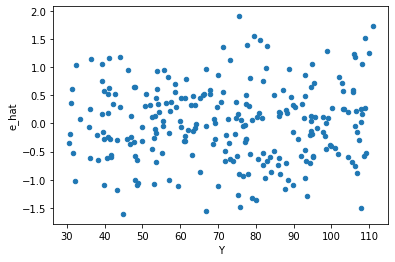

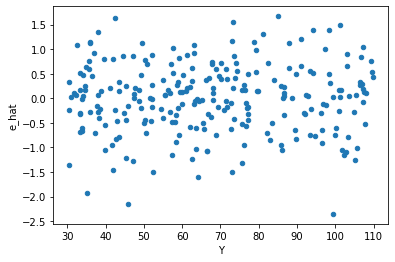

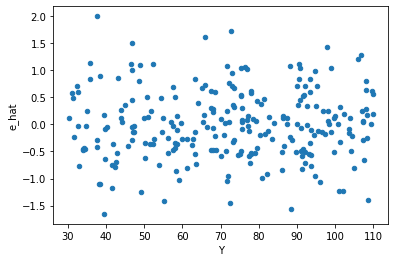

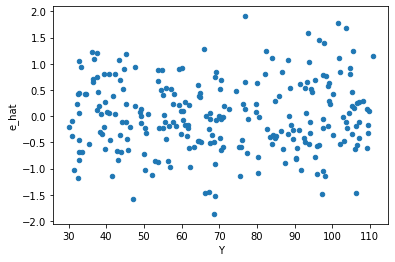

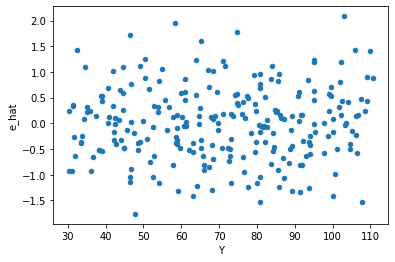

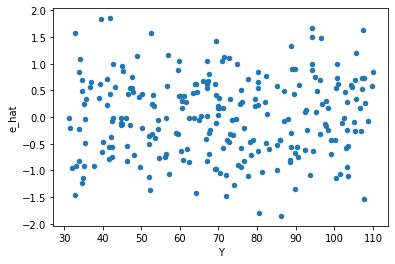

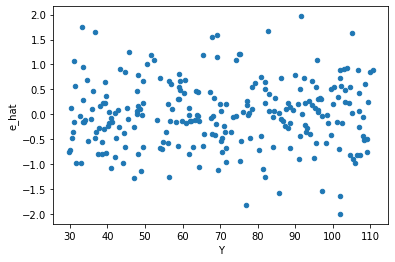

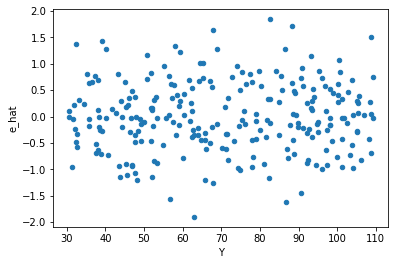

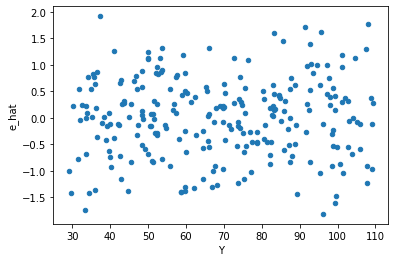

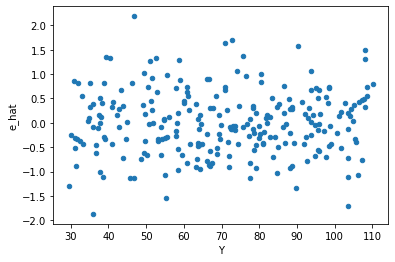

In [12]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='Y', y='e_hat', kind = 'scatter')
tablenew1.plot(x ='Y', y='e_hat', kind = 'scatter')
tablenew2.plot(x ='Y', y='e_hat', kind = 'scatter')
tablenew3.plot(x ='Y', y='e_hat', kind = 'scatter')
tablenew4.plot(x ='Y', y='e_hat', kind = 'scatter')
tablenew5.plot(x ='Y', y='e_hat', kind = 'scatter')
tablenew6.plot(x ='Y', y='e_hat', kind = 'scatter')
tablenew7.plot(x ='Y', y='e_hat', kind = 'scatter')
tablenew8.plot(x ='Y', y='e_hat', kind = 'scatter')
tablenew9.plot(x ='Y', y='e_hat', kind = 'scatter')

In [13]:
def get_result(run_replicate):
    new_table = table.loc[run_replicate]

    # show index
    new_table.reset_index(inplace=True)

    new_table.drop(['index'], axis=1, inplace=True)

    # แบ่งข้อมูลออกเป็น 2 กลุ่มด้วย k-mean

    #Set number of clusters
    x = new_table[["y_hat"]]

    #Another important parameter is init, which defines the method initialization to use (default='k-means++').
    #k-means++ algorithm uses the seeding technique for centroid initialization which is better than the random initialization method.
    kmeans = KMeans(n_clusters=2, init='k-means++', random_state=0).fit(x)

    #Generate cluster predictions and store in y_kmeans
    y_kmeans = kmeans.predict(x)

    #kmean_clusters.astype(float)
    kmean_clusters = pd.DataFrame({"clusters" : y_kmeans})

    # เชื่อมข้อมูลทั้ง 2 DataFrame เข้าด้วยกันด้วยคำสั่ง pd.concat
    data_clusters = pd.concat([new_table, kmean_clusters], axis=1)
    #data_clusters.reset_index(inplace=True)

    # กลุ่มที่ 1
    data_cluster0 = data_clusters[data_clusters.clusters == 0]

    y = data_cluster0[['Y']]
    x = data_cluster0[['x1']]
    x = sm.add_constant(x)
    model1 = sm.OLS(y, x).fit()

    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # กลุ่มที่ 2
    data_cluster1 = data_clusters[data_clusters.clusters == 1]

    y = data_cluster1[['Y']]
    x = data_cluster1[['x1']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()

    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # คำนวณค่าสถิติ
    GQ_test_clusters = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test_clusters, df1, df2)))
    p_greater = ss.f.cdf(GQ_test_clusters, df1, df2)
    p_less = 1.0-ss.f.cdf(GQ_test_clusters, df1, df2)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test_clusters=[]
list_result_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]
#list_result_test01=[]

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less=get_result(run_replicate)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test_clusters.append(GQ_test_clusters)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future versi

In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
0.0,115.0,133.0,44.06735116386567,70.31783105291775,0.383194357946658,0.5287054966384793,1.3797319445712637,0.07323868481077245,0.9633806575946138,0.036619342405386224,Reject001=1 : Homoscedasticity
1.0,140.0,108.0,65.45804665622438,57.57493543705601,0.46755747611588844,0.533101254046815,1.140183359862865,0.4759873319210539,0.762006334039473,0.23799366596052696,Reject001=1 : Homoscedasticity
2.0,142.0,106.0,55.74404852283474,45.151774062775715,0.39256372199179396,0.42596013266769545,1.0850725851753555,0.6605729790212915,0.6697135104893542,0.33028648951064576,Reject001=1 : Homoscedasticity
3.0,139.0,109.0,56.71373424796584,57.32848145516969,0.4080124766040708,0.5259493711483457,1.2890521768497758,0.16628802630677386,0.9168559868466131,0.08314401315338693,Reject001=1 : Homoscedasticity
7.0,125.0,123.0,53.242573094085635,56.479277609382855,0.4259405847526851,0.45918111877547035,1.0780403070585203,0.676709056061354,0.661645471969323,0.338354528030677,Reject001=1 : Homoscedasticity
8.0,126.0,122.0,68.6636187020357,67.70896328565348,0.5449493547780612,0.554991502341422,1.0184276712602967,0.9199660617388767,0.5400169691305616,0.45998303086943837,Reject001=1 : Homoscedasticity
9.0,122.0,126.0,46.04392050922656,61.06118695140958,0.37740918450185706,0.484612594852457,1.2840508783380506,0.16478288587112244,0.9176085570644388,0.08239144293556122,Reject001=1 : Homoscedasticity
11.0,140.0,108.0,62.995804905616176,51.505756534122625,0.4499700350401155,0.476905153093728,1.0598598038894105,0.754954914909626,0.622522542545187,0.377477457454813,Reject001=1 : Homoscedasticity
12.0,103.0,145.0,44.4688069314806,72.4185334651927,0.4317359896260252,0.49943816182891515,1.1568138256473228,0.4173937155297618,0.7913031422351191,0.2086968577648809,Reject001=1 : Homoscedasticity


In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                     if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,115.0,133.0,44.06735116386567,70.31783105291775,0.383194357946658,0.5287054966384793,1.3797319445712637,0.07323868481077245,Reject001=1 : Homoscedasticity
1.0,140.0,108.0,65.45804665622438,57.57493543705601,0.46755747611588844,0.533101254046815,1.140183359862865,0.4759873319210539,Reject001=1 : Homoscedasticity
2.0,142.0,106.0,55.74404852283474,45.151774062775715,0.39256372199179396,0.42596013266769545,1.0850725851753555,0.6605729790212915,Reject001=1 : Homoscedasticity
3.0,139.0,109.0,56.71373424796584,57.32848145516969,0.4080124766040708,0.5259493711483457,1.2890521768497758,0.16628802630677386,Reject001=1 : Homoscedasticity
4.0,126.0,122.0,64.23946583057565,61.01751157201645,0.509837030401394,0.5001435374755447,0.9809870755793912,0.9142961830568945,Reject001=1 : Homoscedasticity
5.0,120.0,128.0,66.17717734286643,65.53470952496492,0.5514764778572202,0.5119899181637885,0.9283984697826858,0.6814698920878675,Reject001=1 : Homoscedasticity
6.0,125.0,123.0,61.57133797028648,51.18907075442903,0.49257070376229184,0.4161713069465775,0.8448965879777867,0.34895453812020916,Reject001=1 : Homoscedasticity
7.0,125.0,123.0,53.242573094085635,56.479277609382855,0.4259405847526851,0.45918111877547035,1.0780403070585203,0.676709056061354,Reject001=1 : Homoscedasticity
8.0,126.0,122.0,68.6636187020357,67.70896328565348,0.5449493547780612,0.554991502341422,1.0184276712602967,0.9199660617388767,Reject001=1 : Homoscedasticity


In [16]:
result_show['Result_test'].value_counts()

Reject001=1 : Homoscedasticity      988
Reject001=0 : Heteroscedasticity     12
Name: Result_test, dtype: int64